In [94]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



In [95]:
# Read GED_Data and convert geom_wkt points from wkt to geometry
GED_Data = gpd.read_file("../data/ged_data_india.csv")

df= GED_Data[["geom_wkt"]]
df['geom_wkt'] = gpd.GeoSeries.from_wkt(df['geom_wkt'])
df['deaths'] = GED_Data["deaths_a"] + GED_Data["deaths_b"] + GED_Data["deaths_civilians"] + GED_Data["deaths_unknown"] 
df['deaths'] = df['deaths'].astype(int)

gdf = gpd.GeoDataFrame(df, geometry="geom_wkt")

/var/folders/ny/vbk2t6r52hd7yvymd0bn98ww0000gp/T/ipykernel_23880/430498560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geom_wkt'] = gpd.GeoSeries.from_wkt(df['geom_wkt'])
/var/folders/ny/vbk2t6r52hd7yvymd0bn98ww0000gp/T/ipykernel_23880/430498560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths'] = GED_Data["deaths_a"] + GED_Data["deaths_b"] + GED_Data["deaths_civilians"] + GED_Data["deaths_unknown"]
/var/folders/ny/vbk2t6r52hd7yvymd0bn98ww0000gp/T/ipykernel_23880/430498560.py:7: Se

In [86]:
ac = gpd.read_file(r"../data/maps/assembly-constituencies/India_AC.shp")
ac = ac[["Map_ID", "geometry"]]

# Spatial join AC Polygons and GED_Data Points
sjoin = gpd.sjoin(ac, gdf, how='left', op='intersects')
map_id = 'Map_ID'

# Group by assembly constituencies and count the number of points/conflicts
count = sjoin.groupby(map_id)[map_id].count()
count

/Users/christinefang/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/ny/vbk2t6r52hd7yvymd0bn98ww0000gp/T/ipykernel_23880/2376724635.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoin = gpd.sjoin(ac, gdf, how='left', op='intersects')


Map_ID
1       15
2        3
3        1
4        1
5        2
        ..
4166     1
4167     1
4168     1
4169     1
4170    49
Name: Map_ID, Length: 4169, dtype: int64

<Axes: >

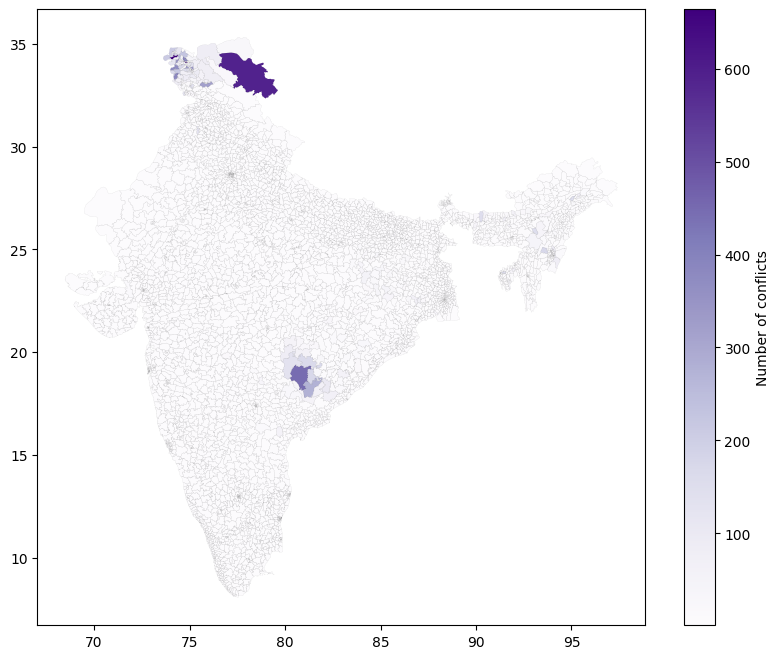

In [87]:
# Choropleth map
count.name='pointcount'
polygons = pd.merge(left=ac, right=count, left_on=map_id, right_index=True)

fig, ax = plt.subplots(figsize = (10,8))
polygons.plot(column = 'pointcount', cmap = 'Purples', ax=ax, legend=True, 
              legend_kwds={'label':'Number of conflicts'})
polygons.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 0.02, ax=ax)

In [91]:
ab = gpd.read_file(r"../data/maps/india administrative boundaries/gadm41_IND_1.shp")
ab = ab[["GID_2", "geometry"]]

# Spatial join AC Polygons and GED_Data Points
sjoin = gpd.sjoin(ab, gdf, how='left', op='intersects')
gid = 'GID_2'

# Group by assembly constituencies and count the number of points/conflicts
count = sjoin.groupby(gid)[gid].count()
count.name='pointcount'
polygons = pd.merge(left=ab, right=count, left_on=gid, right_index=True)

fig, ax = plt.subplots(figsize = (10,8))
polygons.plot(column = 'pointcount', cmap = 'Purples', ax=ax, legend=True, 
              legend_kwds={'label':'Number of conflicts'})
polygons.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 0.02, ax=ax)

KeyError: "['GID_2'] not in index"

In [88]:
sjoin = gpd.sjoin(ac, gdf, how='left', op='intersects')
map_id = 'Map_ID'

# Group by assembly constituencies and count the number of points/conflicts
count = sjoin.groupby(map_id)['deaths'].sum()
count

/Users/christinefang/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/ny/vbk2t6r52hd7yvymd0bn98ww0000gp/T/ipykernel_23880/4010261555.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoin = gpd.sjoin(ac, gdf, how='left', op='intersects')


Map_ID
1       14511.0
2        2280.0
3          10.0
4           0.0
5        1400.0
         ...   
4166        0.0
4167        0.0
4168        0.0
4169        0.0
4170     9433.0
Name: deaths, Length: 4169, dtype: float64

In [93]:
# Choropleth map
count.name='pointcount'
polygons = pd.merge(left=ac, right=count, left_on=map_id, right_index=True)

fig, ax = plt.subplots(figsize = (10,8))
polygons.plot(column = 'pointcount', cmap = 'Purples', ax=ax, legend=True, 
              legend_kwds={'label':'Number of conflicts'})
polygons.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 0.02, ax=ax)

ValueError: You are trying to merge on int64 and object columns for key 'Map_ID'. If you wish to proceed you should use pd.concat